Processing English Dataset...



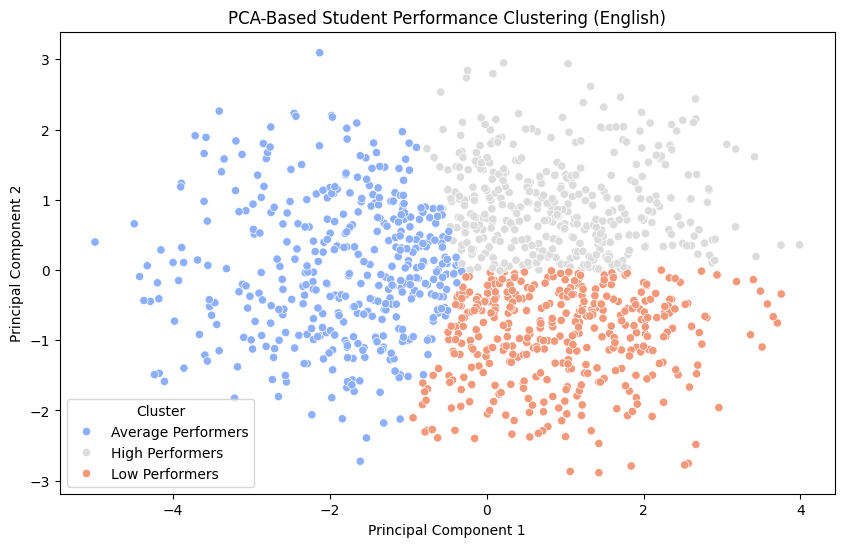

PCA-based clustering for English completed and saved.

--------------------------------------------------


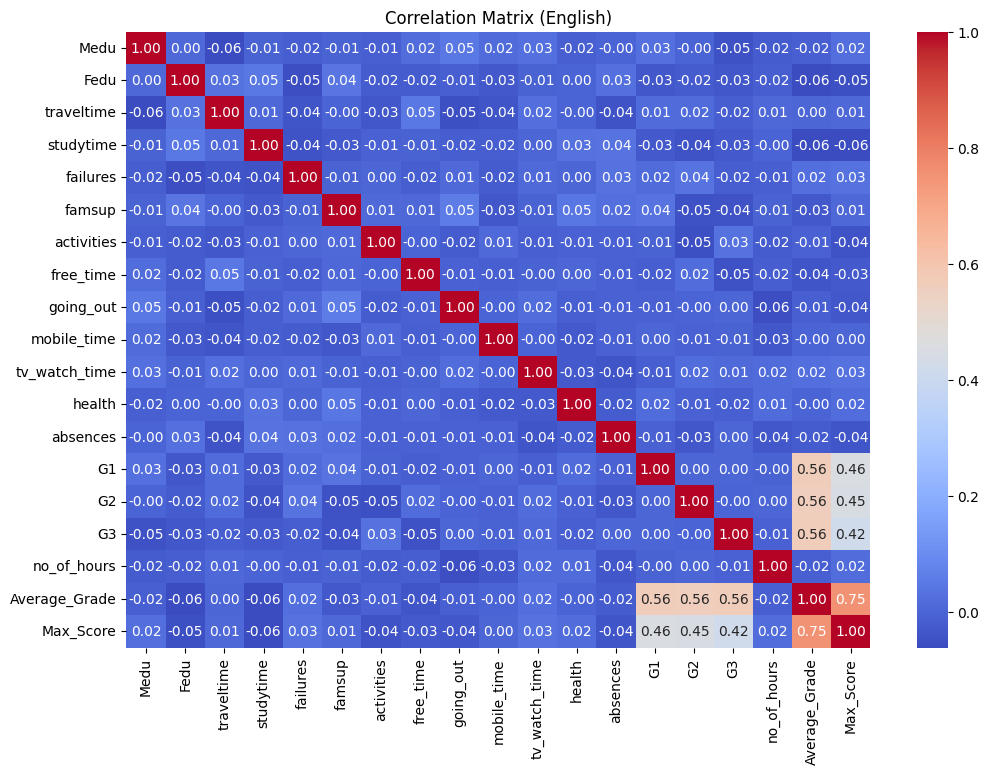

Most Correlated Features (English):
 Average_Grade    0.197666
Max_Score        0.182469
G2               0.122296
G3               0.121407
G1               0.118657
Fedu             0.080078
studytime        0.076847
traveltime       0.076313
famsup           0.075114
absences         0.074307
dtype: float64

--------------------------------------------------

Processing Physics Dataset...



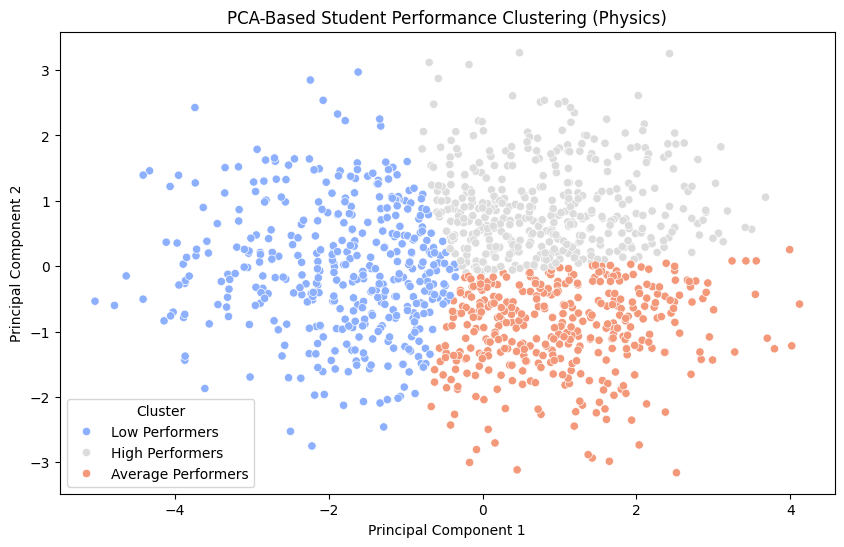

PCA-based clustering for Physics completed and saved.

--------------------------------------------------


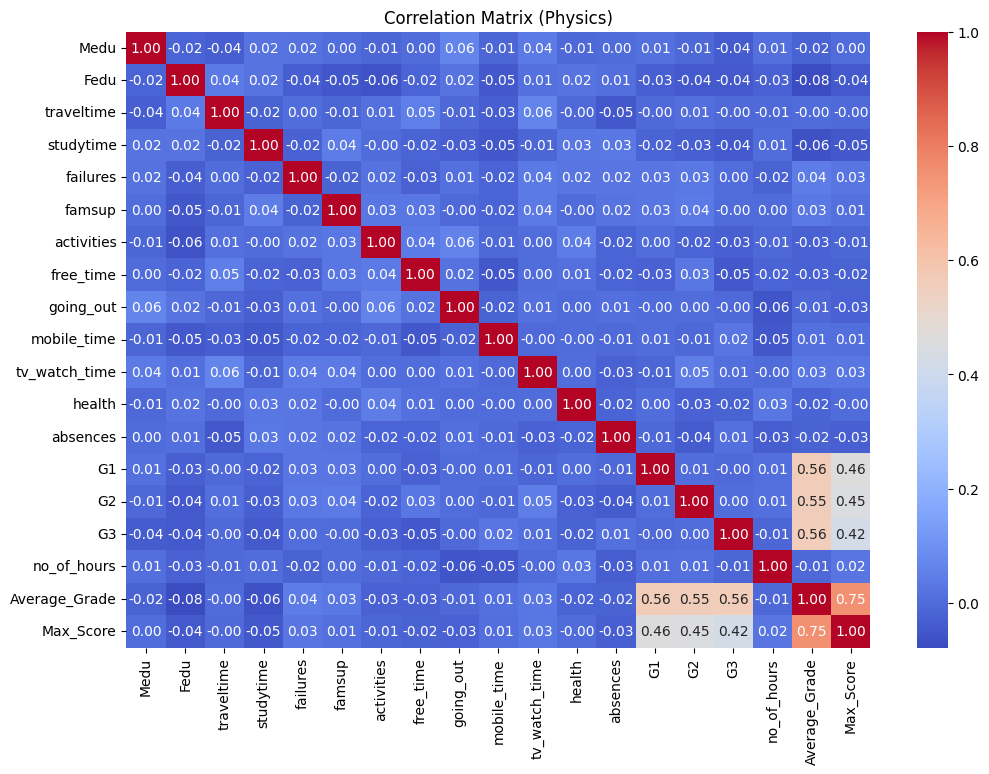

Most Correlated Features (Physics):
 Average_Grade    0.201310
Max_Score        0.177319
G2               0.123801
G3               0.119925
G1               0.117156
Fedu             0.085150
studytime        0.078963
free_time        0.076168
failures         0.074190
activities       0.073622
dtype: float64

--------------------------------------------------

Processing Mathematics Dataset...



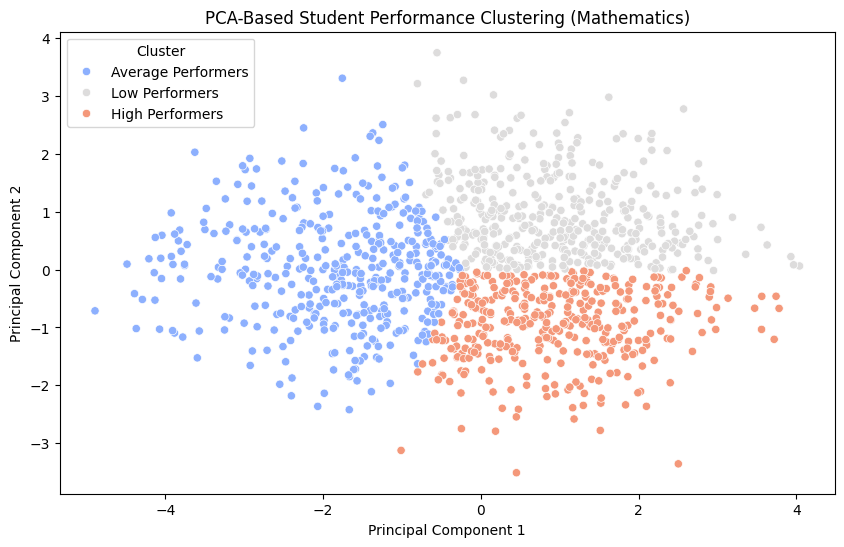

PCA-based clustering for Mathematics completed and saved.

--------------------------------------------------


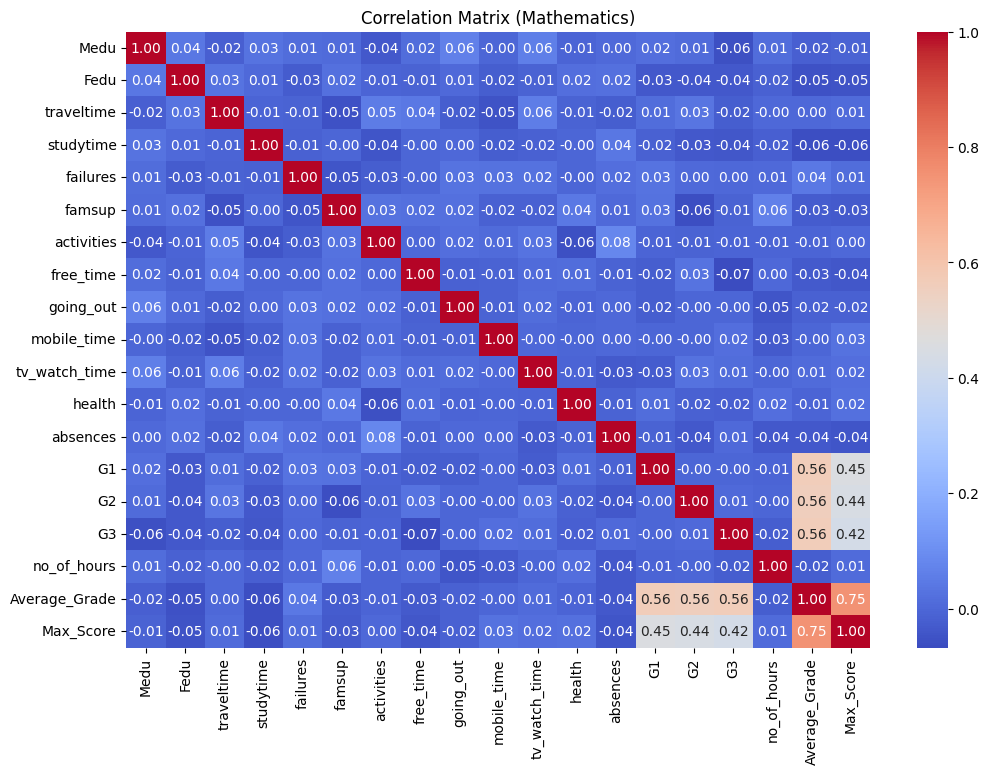

Most Correlated Features (Mathematics):
 Average_Grade    0.198748
Max_Score        0.179870
G2               0.122312
G3               0.122256
G1               0.120011
famsup           0.078973
traveltime       0.076885
Fedu             0.076152
activities       0.075144
studytime        0.074967
dtype: float64

--------------------------------------------------

Processing Computer Science Dataset...



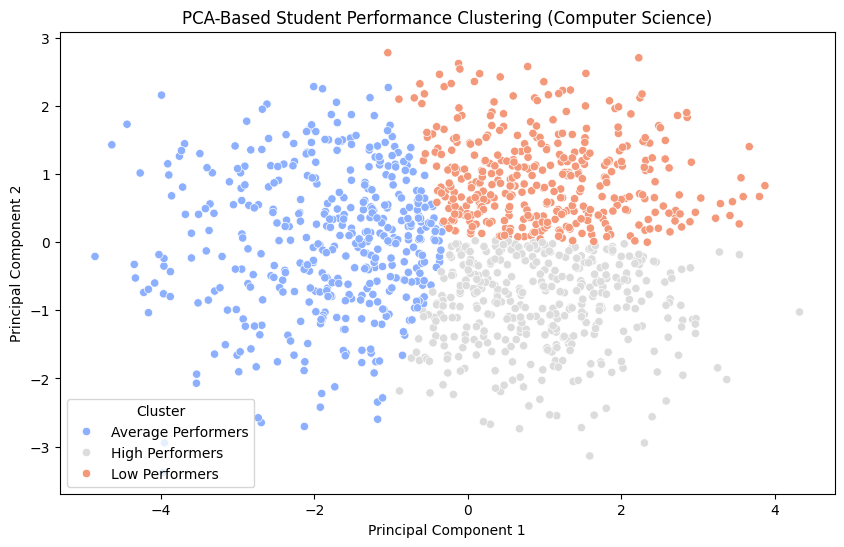

PCA-based clustering for Computer Science completed and saved.

--------------------------------------------------


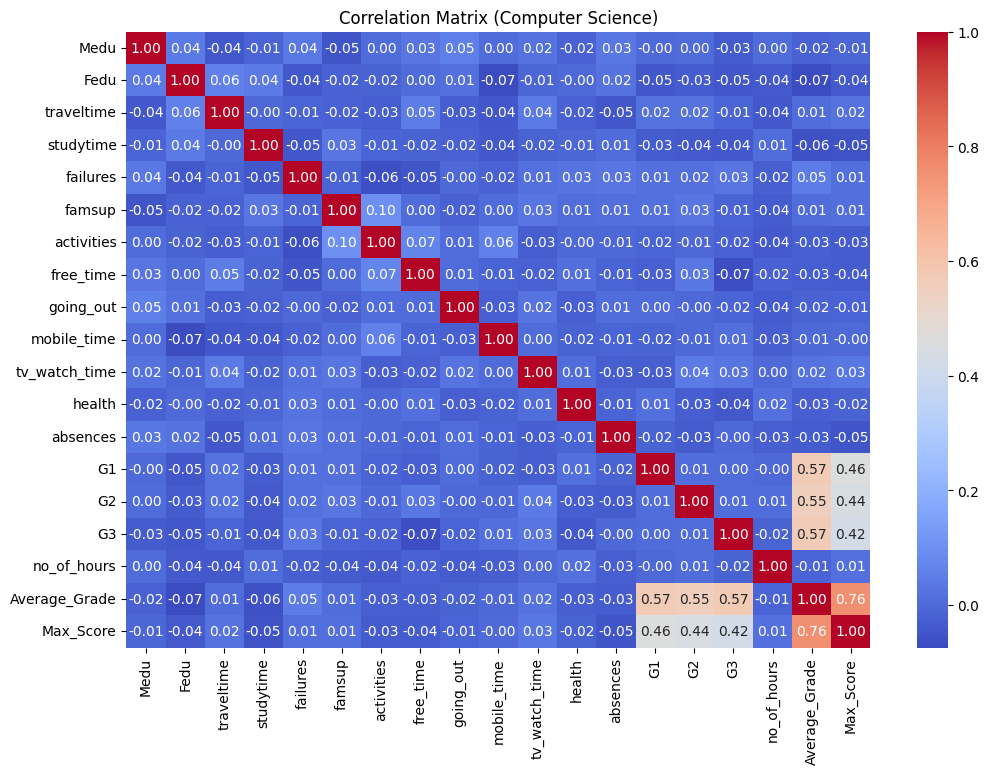

Most Correlated Features (Computer Science):
 Average_Grade    0.201666
Max_Score        0.180397
G3               0.125772
G2               0.121585
G1               0.121069
Fedu             0.085139
activities       0.080820
traveltime       0.080602
failures         0.079212
free_time        0.078739
dtype: float64

--------------------------------------------------



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# List of datasets
subjects = ["English", "Physics", "Mathematics", "Computer Science"]
file_paths = {
    "English": "Modified_English_dataset.csv",
    "Physics": "Modified_Physics_dataset.csv",
    "Mathematics": "Modified_Maths_dataset.csv",
    "Computer Science": "Modified_Computer_Science_dataset.csv"
}

# Loop through each dataset

# Define a list of features to exclude from the correlation analysis (like age)
exclude_features = ['age','sex','student_id']

# Loop through each dataset
for subject, file_path in file_paths.items():
    print(f"Processing {subject} Dataset...\n")
    
    # Load dataset
    df = pd.read_csv(file_path)
    
    # Select all numeric columns except G4 (Final Grade) and any features in exclude_features
    feature_columns = [col for col in df.select_dtypes(include=[np.number]).columns if col != "G4" and col not in exclude_features]
    if not feature_columns:
        print(f"Skipping {subject} as no numeric columns found.\n")
        continue
    
    X = df[feature_columns].dropna()
    y = df.loc[X.index, "G4"]  # Ensure alignment
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform PCA (retain 95% variance)
    #pca = PCA(n_components=0.95)
    pca = PCA(2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Apply KMeans clustering on PCA-transformed data
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df.loc[X.index, 'PCA_Cluster'] = kmeans.fit_predict(X_pca)
    
    # Define cluster names
    cluster_labels = {
        0: "Low Performers",
        1: "Average Performers",
        2: "High Performers"
    }
    df['PCA_Cluster_Name'] = df['PCA_Cluster'].map(cluster_labels)
    
    # Plot clustering results with PCA first two components
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df.loc[X.index, 'PCA_Cluster_Name'], palette='coolwarm')
    plt.title(f"PCA-Based Student Performance Clustering ({subject})")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print(f"PCA-based clustering for {subject} completed and saved.\n")
    print("-"*50)

    # Compute and visualize correlation matrix (excluding G4 and features like 'age')
    numeric_df = df[feature_columns]  # Use only feature columns (without G4 and 'age')
    correlation_matrix = numeric_df.corr()
    
    # Visualize the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix ({subject})")
    plt.show()
    
    # Identify most correlated features (excluding G4 and 'age')
    correlated_features = correlation_matrix.abs().mean().sort_values(ascending=False)
    print(f"Most Correlated Features ({subject}):\n", correlated_features.head(10))
    print("\n" + "-"*50 + "\n")





In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# List of datasets for each subject
file_paths = {
    "English": "Modified_English_dataset.csv",
    "Physics": "Modified_Physics_dataset.csv",
    "Mathematics": "Modified_Maths_dataset.csv",
    "Computer Science": "Modified_Computer_Science_dataset.csv"
}

# Correlated features to predict G4 (adjust for each subject's dataset)
feature_columns = [
    "Average_Grade", "Max_Score", "G3", "G2", "G1", "studytime", 
    "Medu", "going_out", "traveltime", "activities"
]

# Function to train, evaluate and save the model
def train_and_save_model(df, subject):
    # Select the target column (G4)
    target_column = "G4"
    
    # Prepare features (X) and target (y)
    X = df[feature_columns]
    y = df[target_column]
    
    # Split the data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predict the G4 values for the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nPerformance for {subject}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    
    # Save the model as a .pkl file
    model_filename = f"{subject}_updated_random_forest_model.pkl"
    joblib.dump(rf_model, model_filename)
    print(f"Model for {subject} saved as {model_filename}")
    
    # Show predictions for 2-3 test samples
    for i in range(3):
        print(f"\nTest Sample {i + 1} - Predicted G4: {y_pred[i]:.2f}")
        print("Used Features and Their Values:")
        for feature, value in zip(feature_columns, X_test.iloc[i]):
            print(f"  {feature}: {value}")
        print("-" * 50)

# Loop through each subject and process
for subject, file_path in file_paths.items():
    print(f"\nProcessing {subject} Dataset...\n")
    
    # Load dataset
    df = pd.read_csv(file_path)
    
    # Train and save the Random Forest model
    train_and_save_model(df, subject)



Processing English Dataset...


Performance for English:
Mean Squared Error: 45.04
R-squared: 0.95
Model for English saved as English_updated_random_forest_model.pkl

Test Sample 1 - Predicted G4: 62.23
Used Features and Their Values:
  Average_Grade: 11
  Max_Score: 11
  G3: 10
  G2: 10
  G1: 14
  studytime: 5
  Medu: 0
  going_out: 0
  traveltime: 0
  activities: 1
--------------------------------------------------

Test Sample 2 - Predicted G4: 12.55
Used Features and Their Values:
  Average_Grade: 5
  Max_Score: 10
  G3: 2
  G2: 6
  G1: 10
  studytime: 2
  Medu: 1
  going_out: 1
  traveltime: 2
  activities: 3
--------------------------------------------------

Test Sample 3 - Predicted G4: 15.89
Used Features and Their Values:
  Average_Grade: 9
  Max_Score: 14
  G3: 3
  G2: 8
  G1: 14
  studytime: 0
  Medu: 2
  going_out: 3
  traveltime: 3
  activities: 2
--------------------------------------------------

Processing Physics Dataset...


Performance for Physics:
Mean Squared Err

Processing English Dataset...

Performance for English:
Mean Squared Error: 45.04
R-squared: 0.95
Model saved as English_random_forest_model.pkl

Processing Physics Dataset...

Performance for Physics:
Mean Squared Error: 35.98
R-squared: 0.96
Model saved as Physics_random_forest_model.pkl

Processing Mathematics Dataset...

Performance for Mathematics:
Mean Squared Error: 37.96
R-squared: 0.96
Model saved as Mathematics_random_forest_model.pkl

Processing Computer Science Dataset...

Performance for Computer Science:
Mean Squared Error: 44.02
R-squared: 0.95
Model saved as Computer Science_random_forest_model.pkl



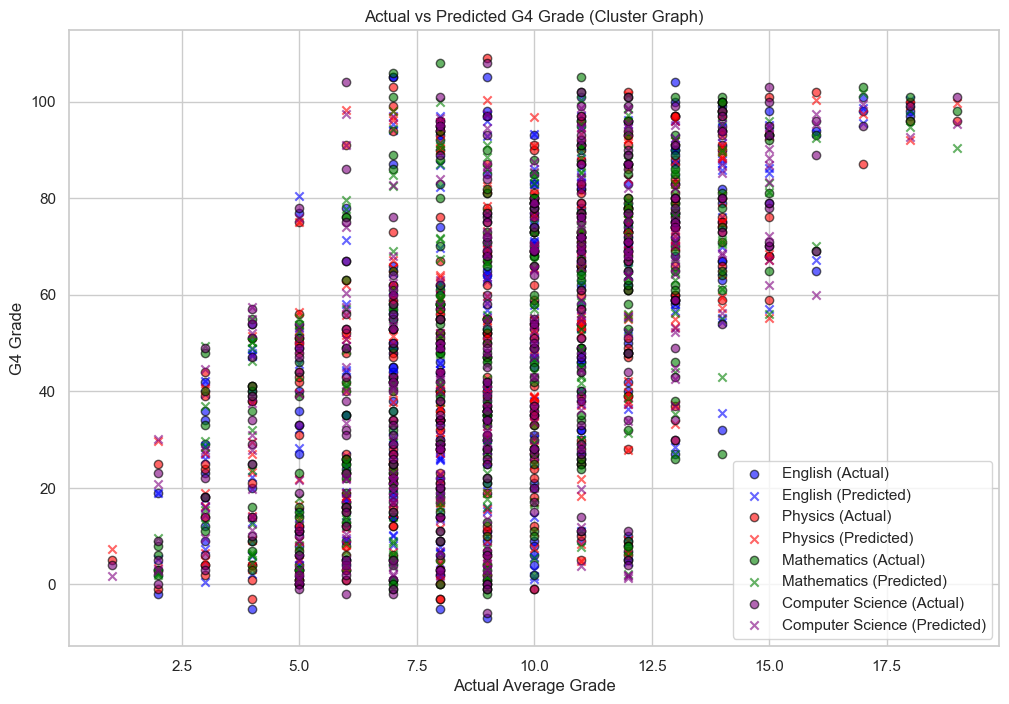

In [3]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# List of datasets for each subject
file_paths = {
    "English": "Modified_English_dataset.csv",
    "Physics": "Modified_Physics_dataset.csv",
    "Mathematics": "Modified_Maths_dataset.csv",
    "Computer Science": "Modified_Computer_Science_dataset.csv"
}

# Correlated features to predict G4
feature_columns = [
    "Average_Grade", "Max_Score", "G3", "G2", "G1", "studytime", 
    "Medu", "going_out", "traveltime", "activities"
]

def train_and_evaluate(df, subject):
    target_column = "G4"
    X = df[feature_columns]
    y = df[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    y_pred = rf_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nPerformance for {subject}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    
    model_filename = f"{subject}_random_forest_model.pkl"
    joblib.dump(rf_model, model_filename)
    print(f"Model saved as {model_filename}\n")
    
    return X_test["Average_Grade"].values, y_test.values, y_pred

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

colors = ["blue", "red", "green", "purple"]
for i, (subject, file_path) in enumerate(file_paths.items()):
    print(f"Processing {subject} Dataset...")
    df = pd.read_csv(file_path)
    
    actual_avg, actual_G4, predicted_G4 = train_and_evaluate(df, subject)
    
    plt.scatter(actual_avg, actual_G4, color=colors[i], label=f"{subject} (Actual)", alpha=0.6, edgecolors='black')
    plt.scatter(actual_avg, predicted_G4, color=colors[i], marker='x', label=f"{subject} (Predicted)", alpha=0.6)

plt.xlabel("Actual Average Grade")
plt.ylabel("G4 Grade")
plt.title("Actual vs Predicted G4 Grade (Cluster Graph)")
plt.legend()
plt.show()

Processing English Dataset...

Performance for English:
Mean Squared Error: 45.04
R-squared: 0.95
Model saved as English_updated_random_forest_model.pkl



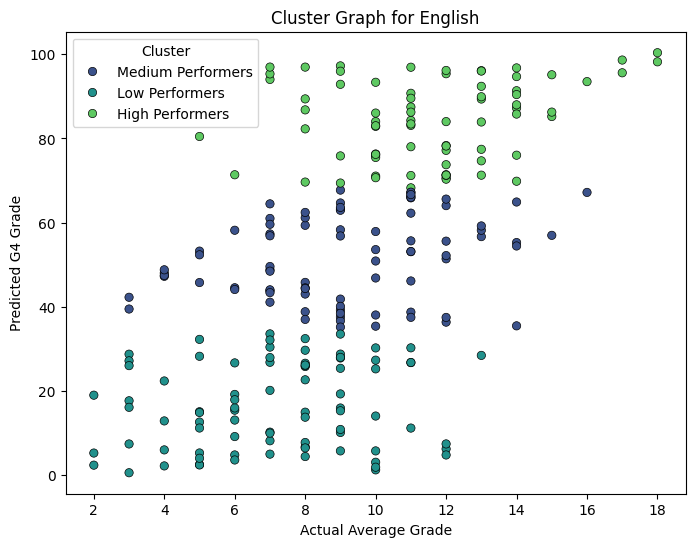

Processing Physics Dataset...

Performance for Physics:
Mean Squared Error: 35.98
R-squared: 0.96
Model saved as Physics_updated_random_forest_model.pkl



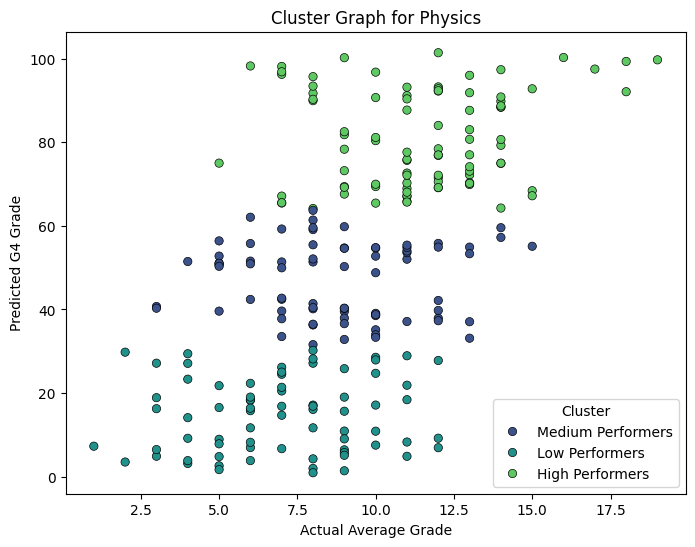

Processing Mathematics Dataset...

Performance for Mathematics:
Mean Squared Error: 37.96
R-squared: 0.96
Model saved as Mathematics_updated_random_forest_model.pkl



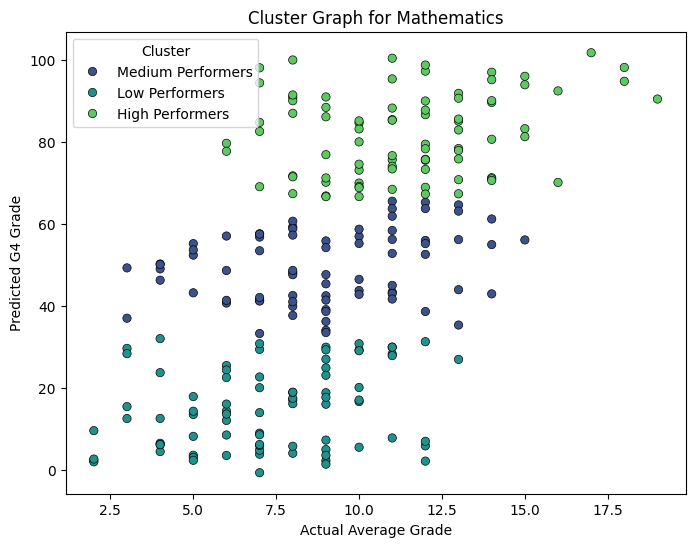

Processing Computer Science Dataset...

Performance for Computer Science:
Mean Squared Error: 44.02
R-squared: 0.95
Model saved as Computer Science_updated_random_forest_model.pkl



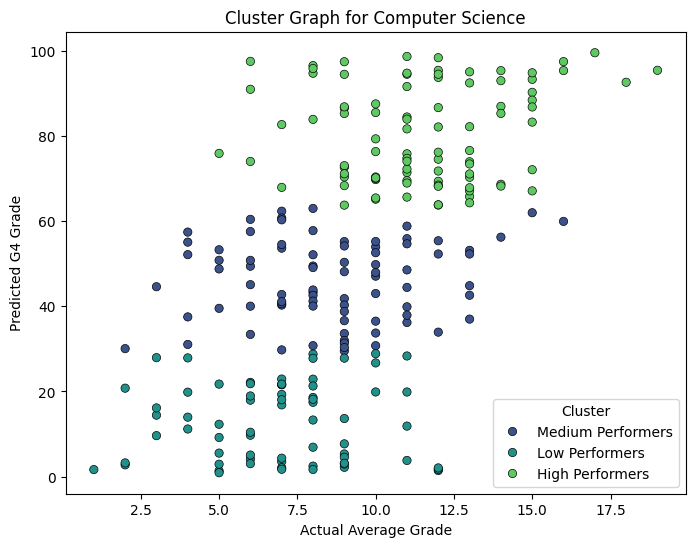

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

# List of datasets for each subject
file_paths = {
    "English": "Modified_English_dataset.csv",
    "Physics": "Modified_Physics_dataset.csv",
    "Mathematics": "Modified_Maths_dataset.csv",
    "Computer Science": "Modified_Computer_Science_dataset.csv"
}

# Correlated features to predict G4
feature_columns = [
    "Average_Grade", "Max_Score", "G3", "G2", "G1", "studytime", 
    "Medu", "going_out", "traveltime", "activities"
]

def train_and_evaluate(df, subject):
    target_column = "G4"
    X = df[feature_columns]
    y = df[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    y_pred = rf_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nPerformance for {subject}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    
    model_filename = f"{subject}_updated_random_forest_model.pkl"
    joblib.dump(rf_model, model_filename)
    print(f"Model saved as {model_filename}\n")
    
    return X_test["Average_Grade"].values, y_test.values, y_pred

for subject, file_path in file_paths.items():
    print(f"Processing {subject} Dataset...")
    df = pd.read_csv(file_path)
    
    actual_avg, actual_G4, predicted_G4 = train_and_evaluate(df, subject)
    
    # Clustering
    data = np.column_stack((actual_avg, predicted_G4))
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(data)
    
    # Dynamically determine cluster labels based on cluster centers
    cluster_centers = kmeans.cluster_centers_[:, 1]  # Get predicted G4 values for each cluster center
    sorted_indices = np.argsort(cluster_centers)  # Sort cluster indices by predicted G4 values
    
    cluster_labels = {
        sorted_indices[0]: "Low Performers",
        sorted_indices[1]: "Medium Performers",
        sorted_indices[2]: "High Performers"
    }
    
    labeled_clusters = [cluster_labels[cluster] for cluster in clusters]
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual_avg, y=predicted_G4, hue=labeled_clusters, palette="viridis", edgecolor="black")
    plt.xlabel("Actual Average Grade")
    plt.ylabel("Predicted G4 Grade")
    plt.title(f"Cluster Graph for {subject}")
    plt.legend(title="Cluster")
    plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import psycopg2

# Database connection details
DB_NAME = "student"
DB_USER = "lsh"
DB_PASSWORD = "9Hwb1wDW"
DB_HOST = "3.6.201.75"
DB_PORT = "5432"

# List of tables for each subject
tables = {
    "English": "english_dataset",
    "Physics": "physics_dataset",
    "Mathematics": "maths_dataset",
    "Computer Science": "computer_science_dataset"
}

# Correlated features to predict G4 (updated to match database column names)
feature_columns = [
    "average_grade", "max_score", "g3", "g2", "g1", "studytime", 
    "medu", "going_out", "traveltime", "activities"
]

# Function to fetch data from the database
def fetch_data_from_db(table_name):
    try:
        # Connect to the database
        conn = psycopg2.connect(
            dbname=DB_NAME,
            user=DB_USER,
            password=DB_PASSWORD,
            host=DB_HOST,
            port=DB_PORT
        )
        
        # Query to fetch data from the table
        query = f"SELECT * FROM {table_name};"
        df = pd.read_sql(query, conn)
        
        # Close the connection
        conn.close()
        
        return df
    except Exception as e:
        print(f"Error fetching data from {table_name}: {e}")
        return None

# Function to train, evaluate, and save the model
def train_and_save_model(df, subject):
    # Select the target column (G4)
    target_column = "g4"
    
    # Prepare features (X) and target (y)
    X = df[feature_columns]
    y = df[target_column]
    
    # Split the data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predict the G4 values for the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nPerformance for {subject}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    
    # Save the model as a .pkl file
    model_filename = f"{subject}_updated_random_forest_model2.pkl"
    joblib.dump(rf_model, model_filename)
    print(f"Model for {subject} saved as {model_filename}")
    
    # Show predictions for 2-3 test samples
    for i in range(3):
        print(f"\nTest Sample {i + 1} - Predicted G4: {y_pred[i]:.2f}")
        print("Used Features and Their Values:")
        for feature, value in zip(feature_columns, X_test.iloc[i]):
            print(f"  {feature}: {value}")
        print("-" * 50)

# Loop through each subject and process
for subject, table_name in tables.items():
    print(f"\nProcessing {subject} Dataset...\n")
    
    # Fetch data from the database
    df = fetch_data_from_db(table_name)
    
    if df is not None:
        # Train and save the Random Forest model
        train_and_save_model(df, subject)


Processing English Dataset...



C:\Users\Dell\AppData\Local\Temp\ipykernel_40536\3534740468.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)



Performance for English:
Mean Squared Error: 45.04
R-squared: 0.95
Model for English saved as English_updated_random_forest_model2.pkl

Test Sample 1 - Predicted G4: 62.23
Used Features and Their Values:
  average_grade: 11
  max_score: 11
  g3: 10
  g2: 10
  g1: 14
  studytime: 5
  medu: 0
  going_out: 0
  traveltime: 0
  activities: 1
--------------------------------------------------

Test Sample 2 - Predicted G4: 12.55
Used Features and Their Values:
  average_grade: 5
  max_score: 10
  g3: 2
  g2: 6
  g1: 10
  studytime: 2
  medu: 1
  going_out: 1
  traveltime: 2
  activities: 3
--------------------------------------------------

Test Sample 3 - Predicted G4: 15.89
Used Features and Their Values:
  average_grade: 9
  max_score: 14
  g3: 3
  g2: 8
  g1: 14
  studytime: 0
  medu: 2
  going_out: 3
  traveltime: 3
  activities: 2
--------------------------------------------------

Processing Physics Dataset...



C:\Users\Dell\AppData\Local\Temp\ipykernel_40536\3534740468.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)



Performance for Physics:
Mean Squared Error: 35.98
R-squared: 0.96
Model for Physics saved as Physics_updated_random_forest_model2.pkl

Test Sample 1 - Predicted G4: 54.70
Used Features and Their Values:
  average_grade: 10
  max_score: 13
  g3: 9
  g2: 9
  g1: 13
  studytime: 5
  medu: 0
  going_out: 0
  traveltime: 0
  activities: 1
--------------------------------------------------

Test Sample 2 - Predicted G4: 8.93
Used Features and Their Values:
  average_grade: 5
  max_score: 10
  g3: 1
  g2: 6
  g1: 11
  studytime: 2
  medu: 0
  going_out: 2
  traveltime: 2
  activities: 1
--------------------------------------------------

Test Sample 3 - Predicted G4: 28.55
Used Features and Their Values:
  average_grade: 10
  max_score: 14
  g3: 4
  g2: 8
  g1: 14
  studytime: 0
  medu: 2
  going_out: 2
  traveltime: 2
  activities: 3
--------------------------------------------------

Processing Mathematics Dataset...



C:\Users\Dell\AppData\Local\Temp\ipykernel_40536\3534740468.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)



Performance for Mathematics:
Mean Squared Error: 37.96
R-squared: 0.96
Model for Mathematics saved as Mathematics_updated_random_forest_model2.pkl

Test Sample 1 - Predicted G4: 43.35
Used Features and Their Values:
  average_grade: 11
  max_score: 12
  g3: 8
  g2: 9
  g1: 15
  studytime: 6
  medu: 0
  going_out: 0
  traveltime: 0
  activities: 2
--------------------------------------------------

Test Sample 2 - Predicted G4: 8.51
Used Features and Their Values:
  average_grade: 6
  max_score: 10
  g3: 1
  g2: 6
  g1: 10
  studytime: 3
  medu: 1
  going_out: 1
  traveltime: 3
  activities: 2
--------------------------------------------------

Test Sample 3 - Predicted G4: 24.88
Used Features and Their Values:
  average_grade: 9
  max_score: 14
  g3: 4
  g2: 8
  g1: 13
  studytime: 1
  medu: 3
  going_out: 3
  traveltime: 2
  activities: 1
--------------------------------------------------

Processing Computer Science Dataset...



C:\Users\Dell\AppData\Local\Temp\ipykernel_40536\3534740468.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)



Performance for Computer Science:
Mean Squared Error: 44.02
R-squared: 0.95
Model for Computer Science saved as Computer Science_updated_random_forest_model2.pkl

Test Sample 1 - Predicted G4: 53.95
Used Features and Their Values:
  average_grade: 10
  max_score: 13
  g3: 9
  g2: 10
  g1: 13
  studytime: 5
  medu: 0
  going_out: 0
  traveltime: 0
  activities: 3
--------------------------------------------------

Test Sample 2 - Predicted G4: 12.28
Used Features and Their Values:
  average_grade: 5
  max_score: 9
  g3: 2
  g2: 6
  g1: 11
  studytime: 3
  medu: 0
  going_out: 2
  traveltime: 3
  activities: 2
--------------------------------------------------

Test Sample 3 - Predicted G4: 26.69
Used Features and Their Values:
  average_grade: 10
  max_score: 15
  g3: 4
  g2: 7
  g1: 15
  studytime: 0
  medu: 3
  going_out: 2
  traveltime: 2
  activities: 2
--------------------------------------------------
